## JUICIOS ABIERTOS RE.NA.LI.

In [15]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import datetime

%matplotlib inline

#pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (7, 5)

In [16]:
#Importo la base

base=pd.read_excel(r'C:\Users\eangenello\Desktop\PYTHON\input\ART\RENALI\Juicios abiertos contratos 2019-2.xlsx')

In [17]:
# Visualizo los primeros datos

base.head()

,Aseguradora,NRO_EXPJUDICIAL,CARATULA,F_notificacion,DPTO_JUDICIAL,FUERO,JUZGADO,provincia,CUIT_emp,EMPLEADOR,...,MONTO_RECLAMADO_INDETERMINADO,MONTO_RECLAMADO,SENT_PRIMERA,CONTIGENCIA,ENF_RECLAMADA,OBJ_RECLAMADO,fsiniestro,Contrato_PMI,Via Adm,Posible via adm
0,ASOCIART,0002-0000019603/16,ALVAREZ JORGE DANIEL C/ ASOCIART S.A. ART S/ D...,2017-11-02,2,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 27,C.A.B.A.,30693148363,ZARA ARGENTINA S A ...,...,N,"1,343,082.00",nan,Accidentes de trabajo.,NaN,CC - Art. 1072,2014-10-12,SI,NO,NO
1,ASOCIART,0002-0000079724/15,MERLO DANIEL FERNANDO C/ ASOCIART S.A. ART S/ ...,2017-04-28,2,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 27,C.A.B.A.,33659119329,TERMINAL PANAMERICANA S A ...,...,N,"1,231,796.40",nan,Accidentes de trabajo.,NaN,CC - Art. 1072,2013-02-15,SI,NO,NO
2,ASOCIART,0002-0000087980/11,MESA DARIO ALEJANDRO C/ OSVALDO OLIVARI SRL Y ...,2018-08-13,2,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 27,C.A.B.A.,30709220221,ESTIBAJES DEL DOCK S.A. ...,...,N,"194,000.00",nan,Accidentes de trabajo.,NaN,CC - Art. 1072,2009-10-23,SI,NO,NO
3,ASOCIART,0012-0000021945/17,BURGOS HECTOR ALEJANDRO C/ ASOCIART S.A. ART Y...,2019-02-14,12,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 37,C.A.B.A.,20048114645,FAGGIANO JORGE HORACIO ...,...,N,"290,000.00",nan,Accidentes de trabajo.,NaN,CC - Art. 1072,2015-04-05,SI,NO,NO
4,ASOCIART,0015-0000095527/12,ZAMBRANO JOSE GUILLERMO C/ EXELTER S.R.L. Y OT...,2014-07-02,15,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 15,C.A.B.A.,30695442846,EXELTAX SRL ...,...,N,"201,456.00",nan,Accidentes de trabajo.,NaN,LRT - Prestación dineraria,2011-02-10,SI,NO,NO


In [18]:
#Cambio el tipo de dato

base['DPTO_JUDICIAL'] = base['DPTO_JUDICIAL'].astype(object)
base['SENT_PRIMERA'] = base['SENT_PRIMERA'].astype(object)

In [20]:
Dataset_compañías=pd.read_excel(r'C:\Users\eangenello\Desktop\PYTHON\input\ART\Dataset_Compañías.xlsx', sheet_name='Sentencias')

base=base.merge(Dataset_compañías, how='inner', on='Aseguradora')

### Imputación de valores missing

In [21]:
# Veo la cantidad de missing en la variable 'Monto Reclamado'

base['MONTO_RECLAMADO'].isna().sum()

30051

In [22]:
# Observo por variable, la cantidad de datos, los missing y el tipo de dato

for i in base.columns:
    print(i)
    print("")
    print(base[i].isnull().value_counts())
    print("")


Aseguradora

False    314686
Name: Aseguradora, dtype: int64

NRO_EXPJUDICIAL

False    314686
Name: NRO_EXPJUDICIAL, dtype: int64

CARATULA

False    314686
Name: CARATULA, dtype: int64

F_notificacion

False    314686
Name: F_notificacion, dtype: int64

DPTO_JUDICIAL

False    314686
Name: DPTO_JUDICIAL, dtype: int64

FUERO

False    314686
Name: FUERO, dtype: int64

JUZGADO

False    314686
Name: JUZGADO, dtype: int64

provincia

False    314686
Name: provincia, dtype: int64

CUIT_emp

False    313834
True        852
Name: CUIT_emp, dtype: int64

EMPLEADOR

False    313768
True        918
Name: EMPLEADOR, dtype: int64

N° SINIESTRO

False    314686
Name: N° SINIESTRO, dtype: int64

MONTO_RECLAMADO_INDETERMINADO

False    273555
True      41131
Name: MONTO_RECLAMADO_INDETERMINADO, dtype: int64

MONTO_RECLAMADO

False    284635
True      30051
Name: MONTO_RECLAMADO, dtype: int64

SENT_PRIMERA

True    314686
Name: SENT_PRIMERA, dtype: int64

CONTIGENCIA

False    314310
True        37

In [23]:
# Me muestra una lista con el nombre de las columnas 

base.columns

Index(['Aseguradora', 'NRO_EXPJUDICIAL', 'CARATULA', 'F_notificacion',
       'DPTO_JUDICIAL', 'FUERO', 'JUZGADO', 'provincia', 'CUIT_emp',
       'EMPLEADOR', 'N° SINIESTRO', 'MONTO_RECLAMADO_INDETERMINADO',
       'MONTO_RECLAMADO', 'SENT_PRIMERA', 'CONTIGENCIA', 'ENF_RECLAMADA',
       'OBJ_RECLAMADO', 'fsiniestro', 'Contrato_PMI', 'Via Adm',
       'Posible via adm', 'cod_cia', 'denominacion_corta'],
      dtype='object')

In [24]:
# Creo la variable año

base['AÑO'] = pd.DatetimeIndex(base['F_notificacion']).year

In [26]:
cias_art=[64,79,254,259,261,348,412,440,605,616,618,619,620,621,624,626,726,862,890,9999]
base1=base.copy()
base1['cias_art']=[1 if np.isin(base.cod_cia.iloc[i],cias_art)==True else 0 for i in range(len(base.index))]

base1=base1[(base1.cias_art==1)]

base1=base1.drop({'cias_art'}, 1)

In [27]:
base1.head(2)

,Aseguradora,NRO_EXPJUDICIAL,CARATULA,F_notificacion,DPTO_JUDICIAL,FUERO,JUZGADO,provincia,CUIT_emp,EMPLEADOR,...,CONTIGENCIA,ENF_RECLAMADA,OBJ_RECLAMADO,fsiniestro,Contrato_PMI,Via Adm,Posible via adm,cod_cia,denominacion_corta,AÑO
0,ASOCIART,0002-0000019603/16,ALVAREZ JORGE DANIEL C/ ASOCIART S.A. ART S/ D...,2017-11-02,2,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 27,C.A.B.A.,30693148363,ZARA ARGENTINA S A ...,...,Accidentes de trabajo.,NaN,CC - Art. 1072,2014-10-12,SI,NO,NO,620,ASOCIART ART,2017
1,ASOCIART,0002-0000079724/15,MERLO DANIEL FERNANDO C/ ASOCIART S.A. ART S/ ...,2017-04-28,2,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 27,C.A.B.A.,33659119329,TERMINAL PANAMERICANA S A ...,...,Accidentes de trabajo.,NaN,CC - Art. 1072,2013-02-15,SI,NO,NO,620,ASOCIART ART,2017


In [28]:
base_año=base1.groupby(['AÑO'], as_index=False)['NRO_EXPJUDICIAL'].count()

In [29]:
base_año

,AÑO,NRO_EXPJUDICIAL
0,2010,3776
1,2011,7712
2,2012,9693
3,2013,13476
4,2014,20008
5,2015,31182
6,2016,49599
7,2017,72128
8,2018,57566
9,2019,27921


In [13]:
# Creo la variable 'codigo', que es una concatenación de 'DPTO JUDICIAL', 'CONTINGENCIA' y 'AÑO'

base["codigo"]=[str(base["DPTO_JUDICIAL"][i])+"-"+str(base["CONTIGENCIA"][i])+"-"+str(base["AÑO"][i]) for i in base.index]

In [14]:
# Cuento la canridad de casos diferentes de la variable 'codigo'

base["codigo"].value_counts()

244-Enfermedad profesional.-2017           851
2213-Enfermedad profesional.-2017          601
244-Accidentes de trabajo.-2017            489
2214-Enfermedad profesional.-2017          486
2213-Enfermedad profesional.-2018          419
2214-Enfermedad profesional.-2016          409
244-Enfermedad profesional.-2016           402
244-Accidentes de trabajo.-2016            393
835-Accidentes de trabajo.-2018            388
2213-Enfermedad profesional.-2016          384
836-Accidentes de trabajo.-2017            376
502-Accidentes de trabajo.-2018            375
2267-Accidentes de trabajo.-2017           370
1089-Accidentes de trabajo.-2017           370
268-Accidentes de trabajo.-2017            370
2268-Accidentes de trabajo.-2017           368
2214-Enfermedad profesional.-2018          365
835-Accidentes de trabajo.-2017            361
143-Accidentes de trabajo.-2016            360
191-Accidentes de trabajo.-2017            359
1358-Enfermedad profesional.-2017          352
2875-Accident

In [15]:
# Remplazo los missing de 'MONTO RECLAMADO' por la media de la variable 'codigo' de cada caso

base["MONTO_RECLAMADO"]=[base["MONTO_RECLAMADO"][i] if math.isnan(base["MONTO_RECLAMADO"][i])==False 
                         else base[base["codigo"]==base["codigo"][i]]["MONTO_RECLAMADO"].mean()
                        for i in base.index]

In [16]:
# Evalúo si quedan missing en la variable 'MONTO RECLAMADO'

base["MONTO_RECLAMADO"].isnull().value_counts()

False    313584
True       1102
Name: MONTO_RECLAMADO, dtype: int64

In [17]:
#for i in base["codigo"].unique():
#    base[base["codigo"]==i]["MONTO_RECLAMADO"].replace(np.nan,base[base["codigo"]==i]["MONTO_RECLAMADO"].mean())

In [18]:
# Me trae todos los datos de 'MONTO RECLAMADO' que tengan el código ="244-Enfermedad profesional.-2017" 

base[base["codigo"]=="244-Enfermedad profesional.-2017"]["MONTO_RECLAMADO"]

7995       281,811.00
7996       225,149.22
8008       368,561.34
8009       528,316.91
8010       353,408.09
8012       318,491.02
8013       361,756.80
8016       683,147.69
26354      254,034.10
26358      191,992.00
26359      842,842.18
26360      690,280.00
35117    1,363,171.00
35143       86,299.85
35195      155,252.00
35209      642,887.13
35231      648,578.00
35288    1,301,754.00
35290    2,886,577.00
35291      629,173.94
35294    1,750,393.00
35295    3,912,694.00
35296    1,501,072.00
35297    1,430,319.08
35298    3,178,934.00
35299    2,791,404.00
35300    1,622,596.00
35302      730,340.00
35303    1,307,322.00
35305      816,843.42
             ...     
298799   1,259,439.60
298800     801,679.00
298801   2,118,213.00
298802   2,216,272.00
298806   1,504,458.90
298807     286,268.16
298808     417,328.41
298810   1,333,521.00
298811   1,014,640.00
298813     812,288.19
298817   3,102,727.00
298818   1,780,392.00
298819   1,260,222.00
298820   1,334,272.00
298821   1

In [19]:
# Me traela media de 'MONTO RECLAMADO' con el código ="244-Enfermedad profesional.-2017" 

base[base["codigo"]=="244-Enfermedad profesional.-2017"]["MONTO_RECLAMADO"].mean()

1083718.0904481132

In [20]:
# Creo la variable 'codigo2', que es una concatenación de 'DPTO JUDICIAL' y 'AÑO'

base["codigo2"]=[str(base["DPTO_JUDICIAL"][i])+"-"+str(base["AÑO"][i]) for i in base.index]

In [21]:
# Cuento la canridad de casos diferentes de la variable 'codigo2'

base["codigo2"].value_counts()

244-2017     1601
244-2016     1035
2213-2017     949
2214-2017     783
836-2017      717
268-2017      699
2214-2016     674
2797-2018     673
2798-2018     672
502-2018      667
2213-2018     663
835-2017      657
835-2018      657
143-2016      654
1089-2017     653
2890-2017     652
2799-2018     649
191-2017      641
2267-2017     641
2214-2018     621
2304-2018     618
2890-2016     617
2213-2016     612
2268-2017     607
1763-2018     601
834-2017      600
502-2017      595
200-2017      593
2797-2019     591
268-2016      588
             ... 
436-2012        1
1229-2013       1
72-2013         1
2007-2017       1
541-2011        1
1043-2014       1
3061-2019       1
253-2014        1
2065-2010       1
495-2012        1
20-2014         1
221-2010        1
2038-2013       1
38-2017         1
374-2012        1
8-2013          1
1412-2017       1
1332-2012       1
3143-2015       1
2355-2013       1
2976-2012       1
997-2017        1
1335-2018       1
377-2013        1
13-2014   

In [22]:
# Remplazo los missing de 'MONTO RECLAMADO' por la media de la variable 'codigo2' de cada caso

base["MONTO_RECLAMADO"]=[base["MONTO_RECLAMADO"][i] if math.isnan(base["MONTO_RECLAMADO"][i])==False 
                         else base[base["codigo2"]==base["codigo2"][i]]["MONTO_RECLAMADO"].mean()
                        for i in base.index]

In [23]:
# Evalúo si quedan missing en la variable 'MONTO RECLAMADO'

base["MONTO_RECLAMADO"].isnull().value_counts()

False    314103
True        583
Name: MONTO_RECLAMADO, dtype: int64

In [24]:
# Remplazo los missing de 'MONTO RECLAMADO' por la media de la variable 'año' de cada caso

base["MONTO_RECLAMADO"]=[base["MONTO_RECLAMADO"][i] if math.isnan(base["MONTO_RECLAMADO"][i])==False 
                         else base[base["AÑO"]==base["AÑO"][i]]["MONTO_RECLAMADO"].mean()
                        for i in base.index]

In [25]:
# Evalúo si quedan missing en la variable 'MONTO RECLAMADO'

base["MONTO_RECLAMADO"].isnull().value_counts()

False    314686
Name: MONTO_RECLAMADO, dtype: int64

In [26]:
# Exporto el dataset

#base.to_excel(r'C:\Users\eangenello\Desktop\TECNICA\Python\output\Stock Juicios Abiertos al 31-03-2019.xlsx', index=False)

### Imputación de valores missing encubiertos

In [27]:
base["MONTO_RECLAMADO"].value_counts()

1.00            6899
0.00             636
240,000.00       332
300,000.00       310
392,740.20       296
150,000.00       264
180,000.00       253
200,000.00       249
327,283.50       232
250,000.00       231
100,000.00       216
120,000.00       203
413,400.00       202
60,000.00        178
400,000.00       176
350,000.00       172
100.00           169
50,000.00        167
80,000.00        165
620,100.00       162
409,026.55       160
500,000.00       158
458,196.90       157
516,750.00       156
450,000.00       155
261,826.80       150
391,487.39       147
367,769.03       142
416,020.95       142
320,574.26       140
                ... 
559,612.63         1
882,854.23         1
220,713.37         1
214,526.00         1
429,080.00         1
2,408,846.04       1
913,232.32         1
188,113.27         1
272,157.60         1
858,199.00         1
6,670,444.00       1
551,912.52         1
830,757.67         1
272,154.35         1
688,604.48         1
858,192.00         1
68,037.40    

In [28]:
base["MONTO_RECLAMADO"]=[base["MONTO_RECLAMADO"][i] if (base["MONTO_RECLAMADO"][i])>999 
                         else base[base["AÑO"]==base["AÑO"][i]]["MONTO_RECLAMADO"].mean()
                        for i in base.index]

In [29]:
print(int(base["MONTO_RECLAMADO"].min()), "-", int(base["MONTO_RECLAMADO"].max()))

1000 - 427522362


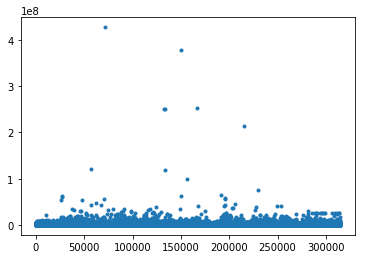

In [30]:
#baseprueba["MONTO_RECLAMADO"].plot()
plt.plot(base["MONTO_RECLAMADO"], '.')

### Dataset Transformado

In [31]:
base.head(3)

,Aseguradora,NRO_EXPJUDICIAL,CARATULA,F_notificacion,DPTO_JUDICIAL,FUERO,JUZGADO,provincia,CUIT_emp,EMPLEADOR,...,OBJ_RECLAMADO,fsiniestro,Contrato_PMI,Via Adm,Posible via adm,cod_cia,denominacion_corta,AÑO,codigo,codigo2
0,ASOCIART,0002-0000019603/16,ALVAREZ JORGE DANIEL C/ ASOCIART S.A. ART S/ D...,2017-11-02,2,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 27,C.A.B.A.,30693148363,ZARA ARGENTINA S A ...,...,CC - Art. 1072,2014-10-12,SI,NO,NO,620,ASOCIART ART,2017,2-Accidentes de trabajo.-2017,2-2017
1,ASOCIART,0002-0000079724/15,MERLO DANIEL FERNANDO C/ ASOCIART S.A. ART S/ ...,2017-04-28,2,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 27,C.A.B.A.,33659119329,TERMINAL PANAMERICANA S A ...,...,CC - Art. 1072,2013-02-15,SI,NO,NO,620,ASOCIART ART,2017,2-Accidentes de trabajo.-2017,2-2017
2,ASOCIART,0002-0000087980/11,MESA DARIO ALEJANDRO C/ OSVALDO OLIVARI SRL Y ...,2018-08-13,2,CIVIL,NACIONAL DE 1ª INSTANCIA EN LO CIVIL Nº 27,C.A.B.A.,30709220221,ESTIBAJES DEL DOCK S.A. ...,...,CC - Art. 1072,2009-10-23,SI,NO,NO,620,ASOCIART ART,2018,2-Accidentes de trabajo.-2018,2-2018


In [32]:
# Exporto el dataset

base.to_excel(r'C:\Users\eangenello\Desktop\TECNICA\Python\output\Stock Juicios Abiertos.xlsx', index=False)

## Dataset Agrupado por Cia

In [48]:
base2=base.groupby(['cod_cia','denominacion_corta','Contrato_PMI'], as_index=False)['Aseguradora'].count()

In [49]:
base2.head()

,cod_cia,denominacion_corta,Contrato_PMI,Aseguradora
0,7,CAMINOS PROTEGIDOS,NO,18
1,7,CAMINOS PROTEGIDOS,SI,1384
2,39,QBE,NO,81
3,39,QBE,SI,419
4,64,VICTORIA,NO,20


In [51]:
base3=base2.pivot_table(index=['cod_cia','denominacion_corta'], values=['Aseguradora'], columns=['Contrato_PMI'])

In [52]:
base3

Aseguradora       
Contrato_PMI                           NO     SI
cod_cia denominacion_corta                      
64      VICTORIA                       20    426
79      HOLANDO SUDAMERICANA           20    846
254     INST. AUTÁRQUICO               56   1554
259     CAJA DE TUCUMÁN                 1    313
261     HORIZONTE                     172   3687
348     PRODUCTORES DE FRUTAS         171   1512
412     LATITUD SUR                     5    171
440     RECONQUISTA ART                80    797
605     SWISS MEDICAL ART            1584  26273
616     EXPERTA ART                  1783  25648
618     SEGUNDA ART                   673  23695
619     GALENO ART                   8902  53309
620     ASOCIART ART                  851  24475
621     PROVINCIA ART                3813  47501
624     BERKLEY ART                   321   2512
626     PREVENCIÓN ART               2571  31678
726     FED. PATRONAL                 496  22410
862     OMINT ART                      64   4671

In [53]:
base3.to_excel(r'C:\Users\eangenello\Desktop\TECNICA\Python\output\Stock Juicios Abiertos por cia ART.xlsx')